In [1]:
import pandas as pd
import numpy as np
import helper
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt

from googletrans import Translator

In [2]:
new = pd.read_csv('daily8_3.csv')

In [5]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54162 entries, 0 to 54161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           54162 non-null  int64  
 1   id              54162 non-null  object 
 2   url             54162 non-null  object 
 3   headline        54162 non-null  object 
 4   dateline        54162 non-null  object 
 5   text            54162 non-null  object 
 6   tags            54162 non-null  object 
 7   source          54162 non-null  object 
 8   text_label      54162 non-null  object 
 9   text_score      54162 non-null  object 
 10  headline_label  54162 non-null  object 
 11  headline_score  54162 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 5.0+ MB


In [7]:
df = new

In [8]:
no_false = df[df.text_label != 'False']
label_map ={'neutral':0,
           'positive':1,
           'negative':-1}
no_false.text_label.map(label_map)

1        0
3        0
4        0
5        0
6        1
        ..
54154    0
54156   -1
54157    0
54158    0
54160    0
Name: text_label, Length: 39011, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54162 entries, 0 to 54161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           54162 non-null  int64  
 1   id              54162 non-null  object 
 2   url             54162 non-null  object 
 3   headline        54162 non-null  object 
 4   dateline        54162 non-null  object 
 5   text            54162 non-null  object 
 6   tags            54162 non-null  object 
 7   source          54162 non-null  object 
 8   text_label      54162 non-null  object 
 9   text_score      54162 non-null  object 
 10  headline_label  54162 non-null  object 
 11  headline_score  54162 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 5.0+ MB


In [10]:
df.tags.value_counts()

['واشنطن']                                                           11218
['القاعدة']                                                          11201
['بوش']                                                               9074
['أمريكا']                                                            3199
['فيسبوك']                                                            2528
                                                                     ...  
['بوش', '9/11', '11 سبتمبر']                                             1
['واشنطن', 'بوش', 'كلينتون', '9/11']                                     1
['بوش', 'تشيني', 'كلينتون', 'القاعدة']                                   1
['واشنطن', 'بوش', 'مركز التجارة العالمي', '11 سبتمبر', 'القاعدة']        1
['أوباما', 'آل غور']                                                     1
Name: tags, Length: 435, dtype: int64

In [11]:
df.tags.nunique()

435

In [241]:
(df.tags.value_counts() > 10).sum()

70

In [315]:
df.tags.value_counts() > 1

['واشنطن']                                                True
['القاعدة']                                               True
['أمريكا']                                                True
['بوش']                                                   True
['أوباما']                                                True
                                                         ...  
['واشنطن', 'بوش', 'كلينتون', 'حرب الخليج', 'القاعدة']    False
['واشنطن', 'بوش', 'كلينتون', 'أسامة بن لادن']            False
['بوش', 'كلينتون', 'القاعدة']                            False
['كلينتون', 'آل غور']                                    False
['بوش', 'كلينتون', 'آل غور', 'حرب الخليج']               False
Name: tags, Length: 334, dtype: bool

In [12]:
tag_count = dict(df['tags'].value_counts())
df['tag_count'] = df['tags']
df['tag_count'] = df['tag_count'].map(tag_count)

tags= df[df.tag_count > 1]

In [13]:
tags.tags.nunique()

264

In [14]:
tags.head()

,index,id,url,headline,dateline,text,tags,source,text_label,text_score,headline_label,headline_score,tag_count
0,0,ETD_ARB_0000033,http://www.alittihad.ae/details.php?id=53&y=20...,الوثائق الرئاسية الأميركية··· متجاهلو التاريخ ...,2008-01-01,ربما نسي الكثيرون الآن الأمر التنفيذي الخاص با...,"['واشنطن', 'بوش']",Alittihad,False,False,negative,0.992800,2464
1,1,ETD_ARB_0000035,http://www.alittihad.ae/details.php?id=55&y=20...,التنبؤات السنوية,2008-01-01,هذه هي حلقة التنبؤات المشتركة السنوية الرابعة ...,"['أوباما', 'كلينتون']",Alittihad,neutral,0.9615980386734009,neutral,0.974024,194
2,2,ETD_ARB_0000036,http://www.alittihad.ae/details.php?id=56&y=20...,شلهوب والحاسوب ·· يقدم وجبة تعليمية وفكرية ممت...,2008-01-01,''''كم هو جميل، هذا العالم السحري عالم الأطفال...,['بوش'],Alittihad,False,False,positive,0.836829,9074
3,3,ETD_ARB_0000062,http://www.alittihad.ae/details.php?id=82&y=20...,48 قتيلاً وجريحاً باعتداءات متفرقة في العراق,2008-01-01,في استهداف جديد لعناصر ''''صحوة'''' العشائر ال...,['القاعدة'],Alittihad,neutral,0.8726907769838969,negative,0.701162,11201
4,4,ETD_ARB_0000065,http://www.alittihad.ae/details.php?id=85&y=20...,النفط فوق 100 دولار·· هيلاري رئيسة لأميركا·· ا...,2008-01-01,استقبل العالم أول أيام العام الجديد ،2008 باحت...,['كلينتون'],Alittihad,neutral,0.9573821425437927,neutral,0.791736,725


In [15]:
df = tags

In [16]:

topics = {'America' : 'أمريكا',
            'American' : 'أمريكيّ',
            'American (f)' : 'أمريكيّة',
            'American (pl)' : 'أمريكيّين',
            'The United States' : 'الولايات المتحدة',
            'The United States' : 'دول موحّدة',
            'Washington' : 'واشنطن',
            'Bush' : 'بوش',
            'Obama' : 'أوباما',
            'Cheney' : 'تشيني',
            'Clinton' : 'كلينتون',
            'Osama Bin Laden' : 'أسامة بن لادن',
            'Al Gore' : 'آل غور',
            'World Trade Center' : 'مركز التجارة العالمي',
            '9/11' : '9/11',
            'September 11' : '11 سبتمبر',
            'Gulf War' : 'حرب الخليج',
            'Google' : 'غوغل',
            'Facebook' : 'فيسبوك',
            'Al Qaida' : 'القاعدة'}

def flip_key_value_pairs(dicts):
    
    res = dict((v,k) for k,v in dicts.items())    
    return res


def make_eng_tags(df_tags):
    eng_tags =[]
    
    rev_topics = flip_key_value_pairs(topics)
    for key, value in rev_topics.items():
        if key in df_tags:
            eng_tags.append(value)
            
    return eng_tags

df['english_tags'] = tags.tags.apply(make_eng_tags)

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_96342/1571876605.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['english_tags'] = tags.tags.apply(make_eng_tags)


In [192]:
df

,index,Unnamed: 0,id,url,headline,dateline,text,tags,source,text_label,text_score,headline_label,headline_score,tag_count,english_tags
0,0,274890,TRN_ARB_0297955,http://tishreen.news.sy/tishreen/public/read/2...,وزير الخارجية الصيني: سنقوم بدور بنّاء وإيجابي...,2013-09-20,\n20/09/2013\nوزير الخارجية الصيني: سنقوم بدور...,['واشنطن'],Techreen,neutral,0.9574713706970215,neutral,0.538953,4393,[Washington]
1,1,274891,TRN_ARB_0297957,http://tishreen.news.sy/tishreen/public/read/2...,قواتنا الباسلة تضيّق الخناق على إرهابيي «القاع...,2013-09-20,\n20/09/2013\nضبط مستودع أسلحة للإرهابيين في د...,['القاعدة'],Techreen,False,False,positive,0.899801,4015,[Al Qaida]
2,2,274892,TRN_ARB_0297958,http://tishreen.news.sy/tishreen/public/read/2...,وزير الخارجية الإيراني: انضمام سورية لمعاهدة ح...,2013-09-20,\n20/09/2013\nوزير الخارجية الإيراني: انضمام س...,['واشنطن'],Techreen,neutral,0.5859406590461731,neutral,0.774108,4393,[Washington]
3,3,274893,TRN_ARB_0297960,http://tishreen.news.sy/tishreen/public/read/2...,استمرار أمريكا وحلفائها بدعم وتسليح الإرهابيين...,2013-09-20,\n20/09/2013\n«الخارجية» في رسالتين إلى رئيس م...,"['أمريكا', 'القاعدة']",Techreen,negative,0.9461716612180074,negative,0.957832,128,"[America, Al Qaida]"
4,4,274894,TRN_ARB_0297984,http://tishreen.news.sy/tishreen/public/read/2...,المفاوض الفلسطيني.. والسباحة من جديد في بحر ال...,2013-09-22,\n22/09/2013\nالمفاوض الفلسطيني.. والسباحة من ...,['واشنطن'],Techreen,negative,0.9543005029360453,negative,0.954988,4393,[Washington]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23557,352,121732,QBS_ARB_0250040,http://www.alqabas.com.kw/print/263738,بوتفليقة يبحث مع كلينتون تعزيز الشراكة الاقتصا...,2012-10-29,(كونا) -- بحث الرئيس الجزائري عبدالعزيز بوتفلي...,"['أمريكا', 'واشنطن', 'كلينتون']",Alqabas,neutral,0.990750253200531,neutral,0.994249,11,"[America, Washington, Clinton]"
23558,353,121733,QBS_ARB_0250057,http://www.alqabas.com.kw/print/263755,الصراع في سوريا يشحذ عزيمة الجهاديين الأردنيين,2012-10-29,عمان- سليمان الخالدي (رويترز)- يسلط إعلان الأر...,['القاعدة'],Alqabas,False,False,positive,0.820226,4015,[Al Qaida]
23559,354,121734,QBS_ARB_0250059,http://www.alqabas.com.kw/print/263757,العودة يدعو إلى الامتناع عن السفر إلى سوريا لل...,2012-10-29,الرياض - يو بي آي - دعا عالم الدين السعودي، ال...,['القاعدة'],Alqabas,neutral,0.6828629374504089,neutral,0.902794,4015,[Al Qaida]
23560,355,121735,QBS_ARB_0250084,http://www.alqabas.com.kw/print/263784,ميامي وليكرز أبرز المرشحين لنيل اللقب,2012-10-29,واشنطن - أ ف ب - يشهد الموسم المقبل من الدوري ...,"['واشنطن', 'بوش']",Alqabas,neutral,0.9449390172958374,neutral,0.904816,804,"[Washington, Bush]"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53991 entries, 0 to 54161
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           53991 non-null  int64  
 1   id              53991 non-null  object 
 2   url             53991 non-null  object 
 3   headline        53991 non-null  object 
 4   dateline        53991 non-null  object 
 5   text            53991 non-null  object 
 6   tags            53991 non-null  object 
 7   source          53991 non-null  object 
 8   text_label      53991 non-null  object 
 9   text_score      53991 non-null  object 
 10  headline_label  53991 non-null  object 
 11  headline_score  53991 non-null  float64
 12  tag_count       53991 non-null  int64  
 13  english_tags    53991 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.2+ MB


In [18]:
df.english_tags.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Washington]                                            11218
[Al Qaida]                                              11201
[Bush]                                                   9074
[America]                                                3199
[Facebook]                                               2528
                                                        ...  
[Washington, Bush, 9/11]                                    2
[Washington, Bush, Obama, Osama Bin Laden]                  2
[Washington, Bush, Google]                                  2
[Bush, Cheney, Clinton, September 11, Al Qaida]             2
[Washington, Obama, Clinton, September 11, Al Qaida]        2
Name: english_tags, Length: 264, dtype: int64

In [321]:
df = df.dropna()

In [19]:
df['english_tags'] 

0            [Washington, Bush]
1              [Obama, Clinton]
2                        [Bush]
3                    [Al Qaida]
4                     [Clinton]
                  ...          
54157                [Al Qaida]
54158                   [Obama]
54159    [Washington, Al Qaida]
54160              [Washington]
54161         [Obama, Al Qaida]
Name: english_tags, Length: 53991, dtype: object

In [20]:
df['string_tags'] = df['english_tags'].apply(lambda x: ','.join(map(str, x)))

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_96342/1390237561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['string_tags'] = df['english_tags'].apply(lambda x: ','.join(map(str, x)))


In [21]:
df['string_tags'].unique()

array(['Washington,Bush', 'Obama,Clinton', 'Bush', 'Al Qaida', 'Clinton',
       'Washington', 'Osama Bin Laden,Al Qaida', 'Bush,Clinton',
       'September 11', 'Washington,Bush,Al Qaida', 'Bush,Obama,Clinton',
       'Google', 'America',
       'Washington,Bush,Obama,Osama Bin Laden,Al Qaida',
       'Washington,Al Qaida', 'Washington,Bush,Clinton',
       'Bush,Cheney,Al Qaida',
       'Washington,Bush,Cheney,Osama Bin Laden,Al Qaida', 'Bush,Obama',
       'Washington,Bush,Cheney,Al Qaida', 'Cheney',
       'Washington,Bush,Gulf War', 'Washington,Obama,Clinton',
       'Bush,Al Qaida', 'Bush,Obama,Clinton,Al Qaida', 'Gulf War',
       'Washington,Obama,Clinton,Al Qaida', 'Washington,Clinton',
       'Washington,Obama,Clinton,Al Gore', 'Bush,September 11,Al Qaida',
       '9/11', 'Washington,Bush,Obama,Clinton',
       'Bush,Obama,Cheney,Clinton', 'Washington,Bush,September 11',
       'Washington,Osama Bin Laden,Al Qaida', 'Washington,Gulf War',
       'Washington,Bush,Cheney', 'Wor

<AxesSubplot:xlabel='string_tags', ylabel='count'>

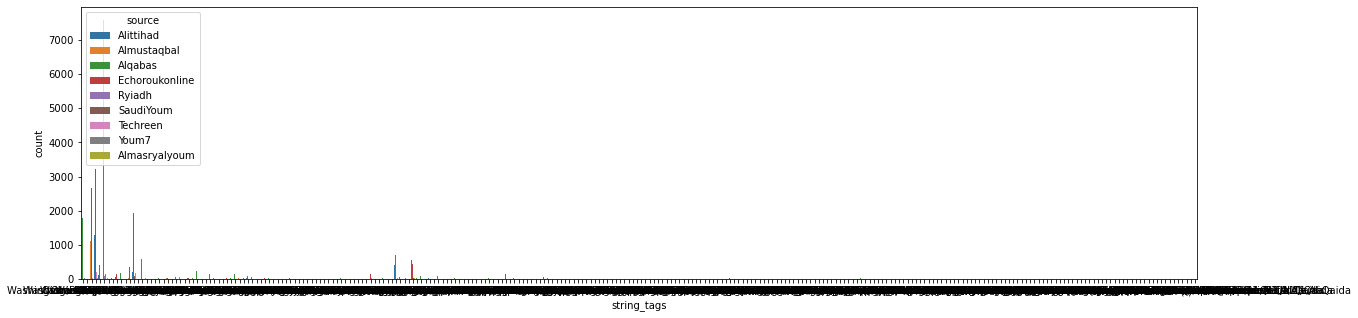

In [22]:
plt.rcParams["figure.figsize"] = (20,5)
sns.countplot(data=df, x= 'string_tags', hue='source')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20362 entries, 0 to 23561
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           20362 non-null  int64         
 1   Unnamed: 0      20362 non-null  int64         
 2   id              20362 non-null  object        
 3   url             20362 non-null  object        
 4   headline        20362 non-null  object        
 5   dateline        20362 non-null  datetime64[ns]
 6   text            20362 non-null  object        
 7   tags            20362 non-null  object        
 8   source          20362 non-null  object        
 9   text_label      20362 non-null  object        
 10  text_score      20362 non-null  object        
 11  headline_label  20362 non-null  object        
 12  headline_score  20362 non-null  float64       
 13  tag_count       20362 non-null  int64         
 14  english_tags    20362 non-null  object        
 15  st

<AxesSubplot:xlabel='string_tags', ylabel='Percent'>

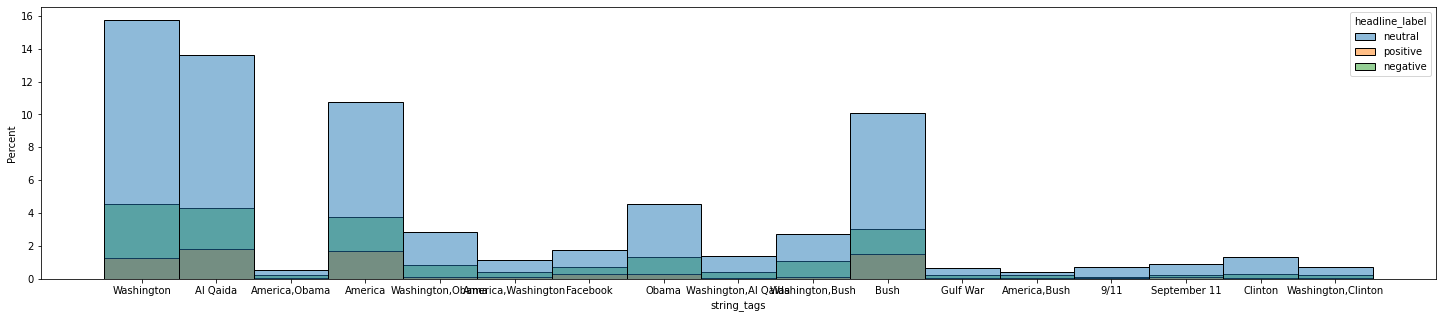

In [142]:
plt.rcParams["figure.figsize"] = (25,5)
sns.histplot(data=df, x= 'string_tags', hue='headline_label', stat='percent')

In [23]:
df = df[df.text_label != 'False']

In [24]:
bush = df[(df['string_tags'] == 'Bush')]
obama = df[(df['string_tags'] == 'Obama')]
clinton = df[(df['string_tags'] == 'Clinton')]

In [25]:
washington = df[(df['string_tags'] == 'Washington')]
al_q = df[(df['string_tags'] == 'Al Qaida')]
america = df[(df['string_tags'] == 'America')]

In [254]:
bush.text_label.value_counts(normalize = True)

neutral     0.736866
negative    0.205163
positive    0.057971
Name: text_label, dtype: float64

In [26]:
bush.text_label.value_counts(normalize = True)

neutral     0.737209
negative    0.195659
positive    0.067132
Name: text_label, dtype: float64

In [255]:
obama.text_label.value_counts(normalize = True)

neutral     0.739781
negative    0.225324
positive    0.034895
Name: text_label, dtype: float64

In [27]:
obama.text_label.value_counts(normalize = True)

neutral     0.778835
negative    0.176576
positive    0.044590
Name: text_label, dtype: float64

In [256]:
clinton.text_label.value_counts(normalize = True)

neutral     0.814815
negative    0.174074
positive    0.011111
Name: text_label, dtype: float64

In [28]:
clinton.text_label.value_counts(normalize = True)

neutral     0.790576
negative    0.157068
positive    0.052356
Name: text_label, dtype: float64

In [29]:
len(clinton)

573

In [259]:
al_q.text_label.value_counts(normalize = True)

neutral     0.749302
negative    0.187151
positive    0.063547
Name: text_label, dtype: float64

In [30]:
al_q.text_label.value_counts(normalize = True)

neutral     0.77841
negative    0.18114
positive    0.04045
Name: text_label, dtype: float64

In [260]:
washington.text_label.value_counts(normalize = True)

neutral     0.798902
negative    0.177116
positive    0.023982
Name: text_label, dtype: float64

In [31]:
washington.text_label.value_counts(normalize = True)

neutral     0.801676
negative    0.169442
positive    0.028882
Name: text_label, dtype: float64

In [262]:
america.text_label.value_counts(normalize = True)

neutral     0.618126
negative    0.317642
positive    0.064232
Name: text_label, dtype: float64

In [32]:
america.text_label.value_counts(normalize = True)

neutral     0.676430
negative    0.251976
positive    0.071595
Name: text_label, dtype: float64

In [270]:
al_q.source.groupby(al_q.text_label).value_counts() 

text_label  source        
negative    Techreen          147
            SaudiYoum          72
            Youm7              63
            Almustaqbal        62
            Almasryalyoum      51
            Alqabas            45
            Ryiadh             39
            Alittihad          37
            Sabanews           11
            Echoroukonline      9
neutral     Youm7             344
            Almustaqbal       298
            SaudiYoum         296
            Alittihad         283
            Sabanews          249
            Alqabas           201
            Techreen          181
            Ryiadh            159
            Almasryalyoum      72
            Echoroukonline     63
positive    SaudiYoum          47
            Alittihad          34
            Ryiadh             24
            Sabanews           20
            Techreen           20
            Alqabas            13
            Youm7              10
            Almustaqbal         8
            Almasryal

<AxesSubplot:xlabel='source', ylabel='Count'>

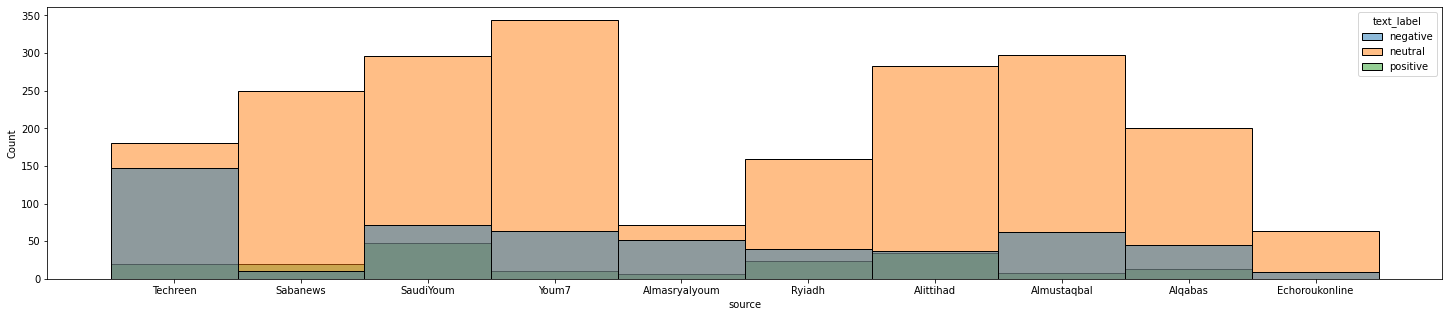

In [296]:
plt.rcParams["figure.figsize"] = (25,5)
sns.histplot(data=al_q, x='source', hue='text_label')

<AxesSubplot:xlabel='source', ylabel='Count'>

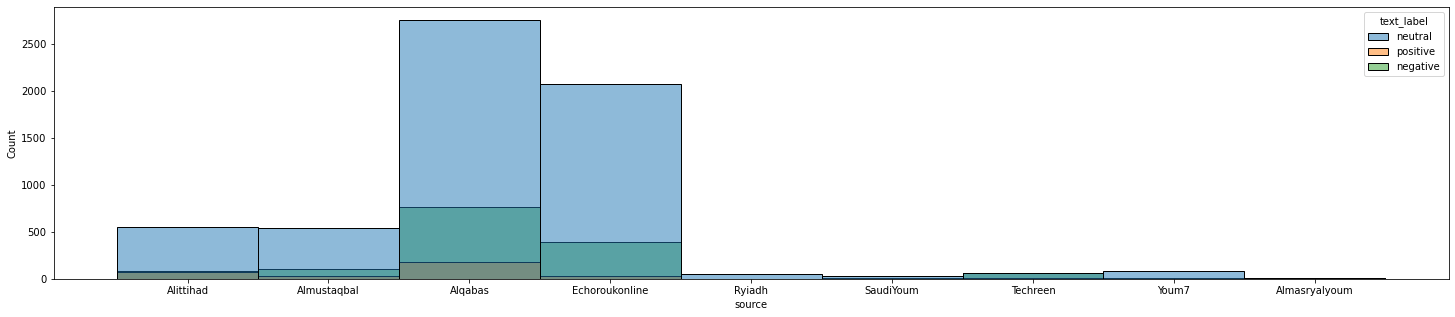

In [33]:
plt.rcParams["figure.figsize"] = (25,5)
sns.histplot(data=al_q, x='source', hue='text_label')

<AxesSubplot:xlabel='source', ylabel='Count'>

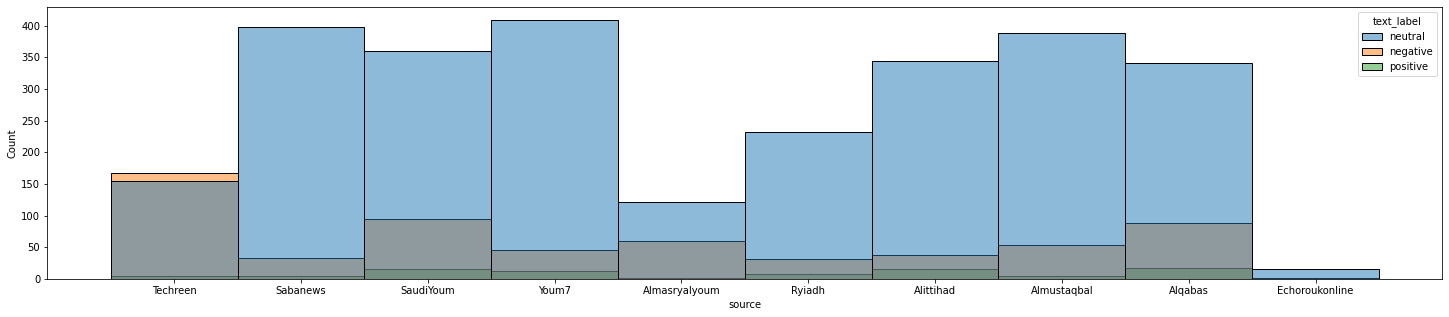

In [298]:
plt.rcParams["figure.figsize"] = (25,5)
sns.histplot(data=washington, x='source', hue='text_label')

In [330]:
df = new

In [299]:
df.source.value_counts()

Youm7             3082
SaudiYoum         2443
Techreen          2026
Almustaqbal       1827
Alittihad         1648
Almasryalyoum     1489
Alqabas           1437
Ryiadh            1318
Sabanews          1085
Echoroukonline     270
Name: source, dtype: int64

In [331]:
df['text_label'].groupby(df.source).value_counts()

source          text_label
Alittihad       neutral       1380
                False         1176
                negative       200
                positive       100
Almasryalyoum   neutral        943
                False          616
                negative       536
                positive        47
Almustaqbal     neutral       1474
                False          811
                negative       359
                positive        37
Alqabas         neutral       1102
                False          497
                negative       295
                positive        66
Echoroukonline  neutral        217
                negative        52
                False           42
                positive         8
Ryiadh          neutral        885
                False          795
                negative       371
                positive        91
Sabanews        neutral        996
                False           68
                negative        63
                positive    

In [333]:
df = df[df.text_label != 'False']

<AxesSubplot:xlabel='source', ylabel='Count'>

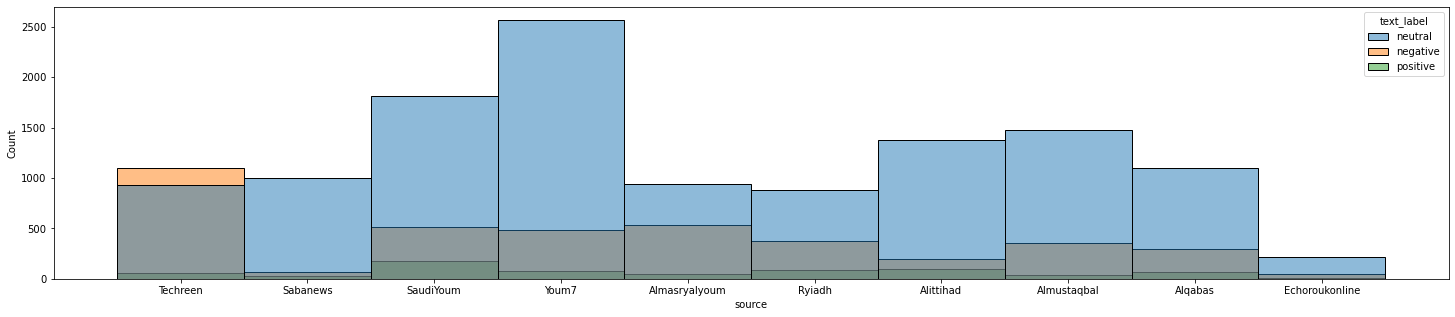

In [334]:
plt.rcParams["figure.figsize"] = (25,5)
sns.histplot(data=df, x='source', hue='text_label')

Look at the high negatives here and also the one, maybe 2 that seem pretty neutral

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16904 entries, 0 to 23561
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           16904 non-null  int64         
 1   Unnamed: 0      16904 non-null  int64         
 2   id              16904 non-null  object        
 3   url             16904 non-null  object        
 4   headline        16904 non-null  object        
 5   dateline        16904 non-null  datetime64[ns]
 6   text            16904 non-null  object        
 7   tags            16904 non-null  object        
 8   source          16904 non-null  object        
 9   text_label      16904 non-null  object        
 10  text_score      16904 non-null  object        
 11  headline_label  16904 non-null  object        
 12  headline_score  16904 non-null  float64       
 13  tag_count       16904 non-null  int64         
 14  english_tags    16904 non-null  object        
 15  st

In [ ]:
Alittihad UAE
Echoroukonline Algeria
Alriyadh Saudi Arabia
Alyaum Saudi Arabia
Tishreen Syria
Alqabas Kuwait
Almustaqbal Lebanon
Almasryalyoum Egypt
youm7 Egypt
Sabanews Yemen

In [335]:
df.source.value_counts()

Youm7             3134
SaudiYoum         2510
Techreen          2083
Almustaqbal       1870
Alittihad         1680
Almasryalyoum     1526
Alqabas           1463
Ryiadh            1347
Sabanews          1089
Echoroukonline     277
Name: source, dtype: int64

In [360]:
topics = {'UAE' : 'Alittihad',
            'Algeria' : 'Echoroukonline',
            'KSA' : 'Ryiadh',
            'KSA' : 'SaudiYoum',
            'Syria' : 'Techreen',
            'Kuwait' : 'Alqabas',
            'Lebanon' : 'Almustaqbal',
            'Egypt' : 'Almasryalyoum',
            'Egypt' : 'Youm7',
            'Yemen' : 'Sabanews'}

def flip_key_value_pairs(dicts):
    
    res = dict((v,k) for k,v in dicts.items())    
    return res


def make_countries(df):
    country_tags =[]
    
    rev_topics = flip_key_value_pairs(topics)
    for key, value in rev_topics.items():
        if key in df:
            country_tags.append(value)
            
    return country_tags

df['country'] = df.source.apply(make_countries)

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_51119/3458671951.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df.source.apply(make_countries)


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16979 entries, 0 to 23561
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           16979 non-null  int64         
 1   Unnamed: 0      16979 non-null  int64         
 2   id              16979 non-null  object        
 3   url             16979 non-null  object        
 4   headline        16979 non-null  object        
 5   dateline        16979 non-null  datetime64[ns]
 6   text            16979 non-null  object        
 7   tags            16979 non-null  object        
 8   source          16979 non-null  object        
 9   text_label      16979 non-null  object        
 10  text_score      16979 non-null  object        
 11  headline_label  16979 non-null  object        
 12  headline_score  16979 non-null  float64       
 13  tag_count       16979 non-null  int64         
 14  country         16979 non-null  object        
 15  co

In [351]:
df.country.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Egypt]      3134
[]           2873
[KSA]        2510
[Syria]      2083
[Lebanon]    1870
[UAE]        1680
[Kuwait]     1463
[Yemen]      1089
[Algeria]     277
Name: country, dtype: int64

In [349]:
df.source.value_counts().sum()

16979

In [352]:
df['country_string'] = df['country'].apply(lambda x: ','.join(map(str, x)))

/var/folders/s4/hmz6ljm533vgpm_bhv59yw0m0000gn/T/ipykernel_51119/844095673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_string'] = df['country'].apply(lambda x: ','.join(map(str, x)))


In [356]:
df['country_string'].value_counts()

Egypt      3134
           2873
KSA        2510
Syria      2083
Lebanon    1870
UAE        1680
Kuwait     1463
Yemen      1089
Algeria     277
Name: country_string, dtype: int64

In [357]:
df.source.value_counts()

Youm7             3134
SaudiYoum         2510
Techreen          2083
Almustaqbal       1870
Alittihad         1680
Almasryalyoum     1526
Alqabas           1463
Ryiadh            1347
Sabanews          1089
Echoroukonline     277
Name: source, dtype: int64